In [5]:
#Завдання 1. Зниженнярозмірності і візуалізація даних
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')  # Suppress all warnings
df = pd.read_csv("D:\\AD labs\\lala\\Machine_learning_labs\\new_model.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


In [3]:
X = df.drop(columns=['Class'])
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
#Класифікація без зменшення розмірності 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression()
start = time.time()
model.fit(X_train, y_train)
end = time.time()

y_pred = model.predict(X_test)

acc_original = accuracy_score(y_test, y_pred)
time_original = end - start

print("Точність без PCA:", acc_original)
print("Час навчання без PCA:", time_original)

Точність без PCA: 0.9916666666666667
Час навчання без PCA: 0.032464027404785156


In [5]:
#PCA + Класифікація
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model_pca = LogisticRegression()
start = time.time()
model_pca.fit(X_train_pca, y_train)
end = time.time()

y_pred_pca = model_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
time_pca = end - start

print("Точність з PCA:", acc_pca)
print("Час навчання з PCA:", time_pca)

Точність з PCA: 0.9916666666666667
Час навчання з PCA: 0.0018773078918457031


In [ ]:
#Висновок:
#Після застосування методу PCA розмірність даних була зменшена до 2 компонент. 
#У результаті час навчання моделі зменшився, що свідчить про пришвидшення роботи алгоритму. 
#Разом з тим точність класифікації залишилась незмінною, але в інших випадках та на інших датасетах точність класифікації з зниженням розмірності може трішки просідати, або навпаки покращуватися, 
#це також залежить від датасетуц та моделі класифікації
#Це означає, що PCA дозволяє скоротити обсяг даних без критичної втрати якості, але може призвести до втрати частини інформації.

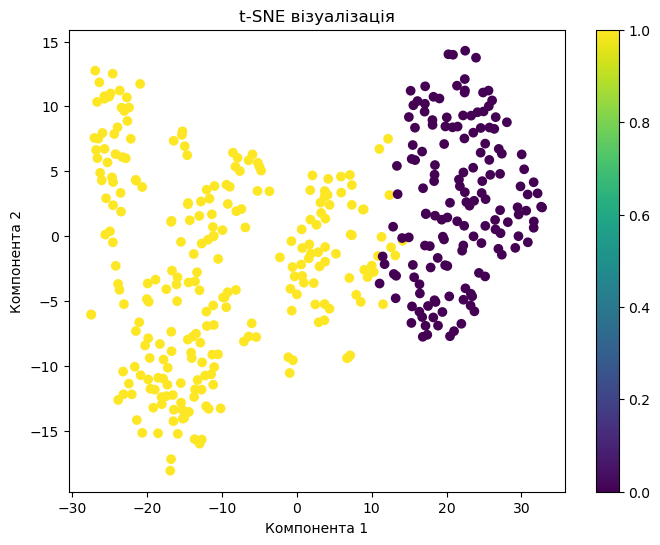

In [6]:
#t-SNE для візуалізації
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis')
plt.title("t-SNE візуалізація")
plt.xlabel("Компонента 1")
plt.ylabel("Компонента 2")
plt.colorbar()
plt.show()

In [ ]:
"""
Пояснення t-SNE візуалізації:
Взагалі метод t-SNE використовується для візуалізації багатовимірних даних у двовимірному просторі для потенційного вимявлення кластерів або груп подібних об'єктів. 
На побудованій t-SNE візуалізації видно два чітко виражені кластери точок, які відповідають різним класам у вибірці. 
Кластери добре відокремлені один від одного, що свідчить про наявність природної кластерної структури у даних та їхню хорошу роздільність у високовимірному просторі
Це підтверджує доцільність використання алгоритмів класифікації для цього датасету.
"""


In [1]:
#2. Кластерний аналіз
from sklearn.cluster import KMeans
from skimage import data
from skimage.io import imread
from skimage.io import imread

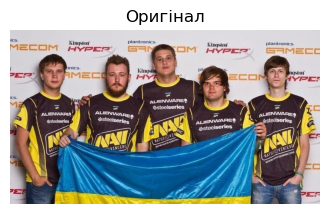

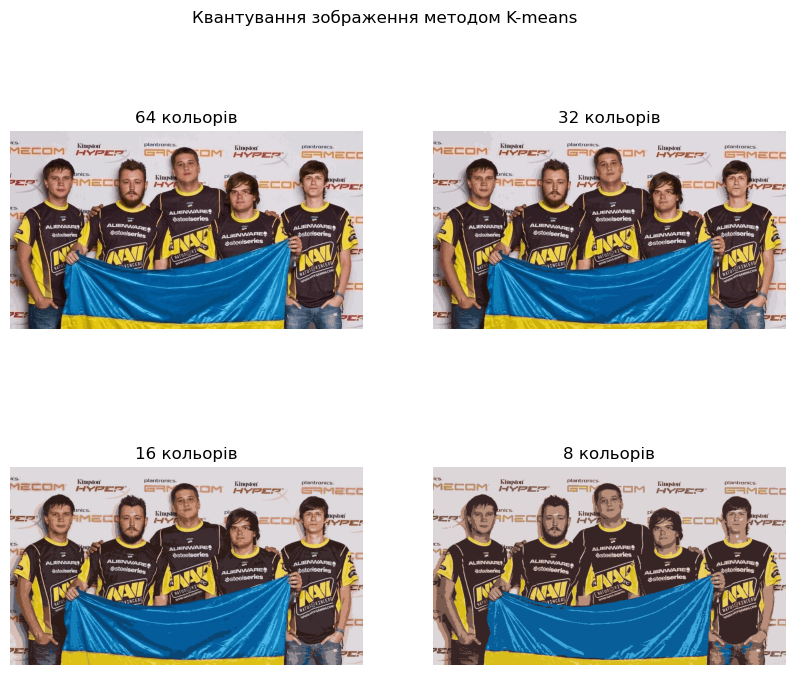

In [6]:
image = imread("C:\\Users\\User\\Downloads\\Navi.jpg")  # стандартне тестове зображення
plt.figure(figsize=(4,4))
plt.imshow(image)
plt.title("Оригінал")
plt.axis("off")
plt.show()

# Функція квантування
def kmeans_quantization(img, k):
    pixels = img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    new_colors = kmeans.cluster_centers_[kmeans.labels_]
    return new_colors.reshape(img.shape).astype(np.uint8)

levels = [64, 32, 16, 8]

quantized = []

for k in levels:
    q_img = kmeans_quantization(image, k)
    quantized.append((k, q_img))

# Відображення результатів
plt.figure(figsize=(10,8))
for i, (k, img_q) in enumerate(quantized, 1):
    plt.subplot(2,2,i)
    plt.imshow(img_q)
    plt.title(f"{k} кольорів")
    plt.axis("off")

plt.suptitle("Квантування зображення методом K-means")
plt.show()

In [25]:
#3. Обробка та класифікація текстових даних
"""
Датасет -- https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation?resource=download
Опис: 
Dataset contains two features text and label.
No. of Rows : 2225
No. of Columns : 2

Text:It contains different categories of text data
**Label: **It contains labels for five different categories : 0,1,2,3,4

Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4
"""

data = pd.read_csv("C:\\Users\\User\\Downloads\\df_file.csv",
                   sep=",", header=0,
    names=['text', 'label'])
data['text'] = data['text'].astype(str).str.replace('\n', ' ', regex=True) #очищуємо текст від зайвих згнаків переносу строки
data['text'] = data['text'].str.replace(r'\s+', ' ', regex=True).str.strip() #очищуємо текст від зайвих пробілів
print(data.head())

                                                text  label
0  Budget to set scene for election Gordon Brown ...      0
1  Army chiefs in regiments decision Military chi...      0
2  Howard denies split over ID cards Michael Howa...      0
3  Observers to monitor UK election Ministers wil...      0
4  Kilroy names election seat target Ex-chat show...      0


In [26]:
#3.1 Передобробка тексту: Видалимо пунктуацію, стоп-слова, переведемо в нижній реєстр
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)
print("Оброблений датасет з текстом: ")
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Оброблений датасет з текстом: 


,text,label,clean_text
0,Budget to set scene for election Gordon Brown ...,0,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision Military chi...,0,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards Michael Howa...,0,howard denies split id cards michael howard de...
3,Observers to monitor UK election Ministers wil...,0,observers monitor uk election ministers invite...
4,Kilroy names election seat target Ex-chat show...,0,kilroy names election seat target exchat show ...


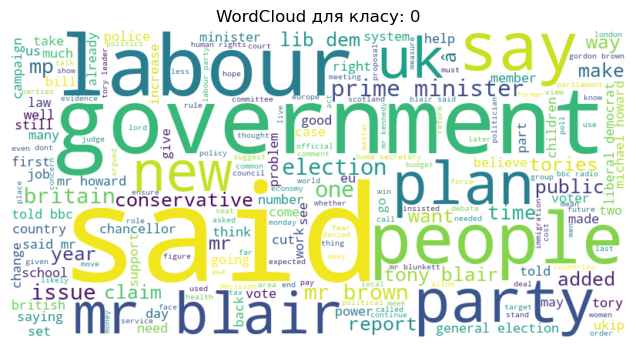

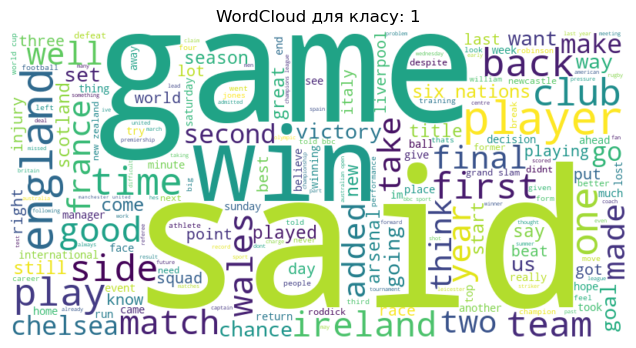

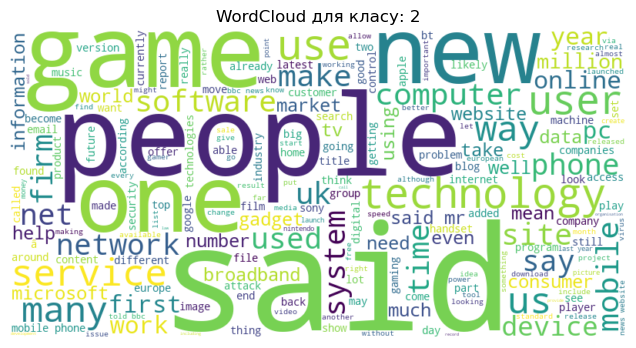

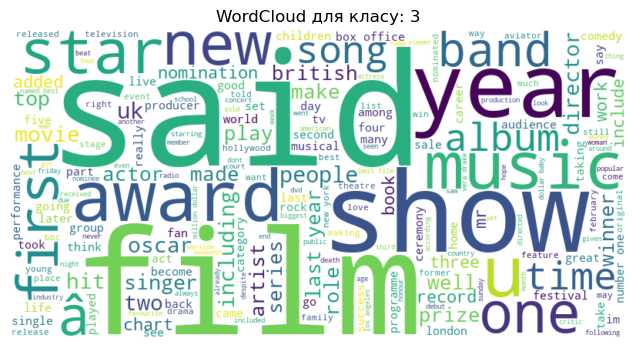

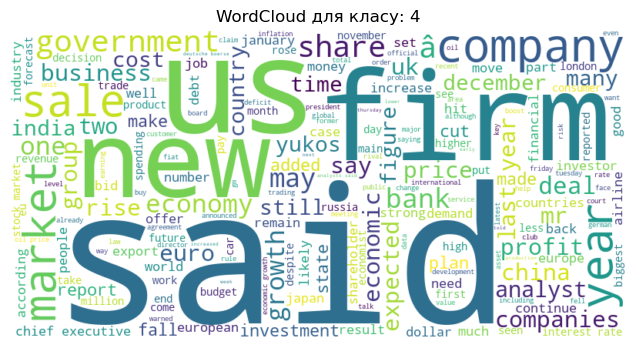

In [27]:
#3.2 WordCloud для кожного класу
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label in data['label'].unique():
    text = " ".join(data[data['label'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud для класу: {label}")
    plt.show()


In [28]:
#3.3 Векторизація 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(data['clean_text'])
y = data['label']
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 826681 stored elements and shape (2225, 378069)>
  Coords	Values
  (0, 55425)	0.06451660709137129
  (0, 301694)	0.0262444678853984
  (0, 294186)	0.026055118334430003
  (0, 111642)	0.05280777914317281
  (0, 149690)	0.020782882802446986
  (0, 54659)	0.041124939250194316
  (0, 298369)	0.02364116353188602
  (0, 266008)	0.014718710173314014
  (0, 109871)	0.09059695113632181
  (0, 63456)	0.019439212892841194
  (0, 186760)	0.021880005475779406
  (0, 46284)	0.020562469625097158
  (0, 336703)	0.01571902796471096
  (0, 334151)	0.02166277442809635
  (0, 256026)	0.037692074575687275
  (0, 96339)	0.03738867864128725
  (0, 228433)	0.030942923327187108
  (0, 1538)	0.03738867864128725
  (0, 147633)	0.023798402262858613
  (0, 121708)	0.029101193529795153
  (0, 322781)	0.030641863884225396
  (0, 167863)	0.02761135975844883
  (0, 81762)	0.022223634241042747
  (0, 109581)	0.018201476662548118
  (0, 317240)	0.027449282160509153
  :	:
  (2224, 23

In [29]:
#3.4 Класифікація 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Точність:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Точність: 0.9535928143712575
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       131
           1       0.98      1.00      0.99       159
           2       0.97      0.91      0.94       117
           3       0.98      0.88      0.93       108
           4       0.89      0.99      0.93       153

    accuracy                           0.95       668
   macro avg       0.96      0.95      0.95       668
weighted avg       0.96      0.95      0.95       668

[[125   0   1   0   5]
 [  0 159   0   0   0]
 [  0   2 107   2   6]
 [  2   2   1  95   8]
 [  1   0   1   0 151]]
